In [17]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import math
from random import randint
from math import ceil

In [18]:
np.random.seed(42)

In [19]:
def randomized_select(A, p, r, i):
	if p == r:
		return A[p]  
	q = partition(A, p, r)
	k = q - p + 1  
	if i == k:  
		return A[q]
	elif i < k:
		return randomized_select(A, p, q-1, i)  
	else:
		return randomized_select(A, q+1, r, i-k) 

In [20]:
def randomized_partition(A, p, r):
	i = randint(p, r)  
	A[i], A[r] = A[r], A[i]  
	return partition(A, p, r)

In [21]:
def partition(A, p, r):
	x = A[r]  
	i = p - 1  
	for j in range(p, r):  
		if A[j] <= x: 
			i += 1  
			A[i], A[j] = A[j], A[i] 
	A[i + 1], A[r] = A[r], A[i + 1] 
	return i + 1  

In [22]:
def partition_around(A, p, r, x):
	i = p
	while A[i] != x:
		i += 1

	A[i], A[r] = A[r], A[i]

	return partition(A, p, r)

In [23]:
def strided_insertion_sort_five(A, p, g):
	for i in range(1, 5):
		key = A[p + i*g]
		j = i - 1
		while j >= 0 and A[p + j*g] > key:
			A[p + (j + 1)*g] = A[p + j*g]
			j -= 1
		A[p + (j + 1)*g] = key

In [24]:
def select(A, p, r, i):
	while (r-p+1) % 5 != 0:
		for j in range(p+1, r+1):  
			if A[p] > A[j]:
				A[p], A[j] = A[j], A[p]

		if i == 1:
			return A[p]
		p += 1
		i -= 1

	g = (r-p+1) // 5         
	for j in range(p, p+g):  
		strided_insertion_sort_five(A, p, g)

	x = select(A, p + 2*g, p + 3*g - 1, ceil(g / 2))
	q = partition_around(A, p, r, x) 

	k = q - p + 1  
	if i == k:
		return A[q]  
	elif i < k:
		return select(A, p, q - 1, i)  
	else:
		return select(A, q + 1, r, i - k)

In [25]:
def find_median(A):
	from insertion_sort import insertion_sort

	insertion_sort(A, len(A))
	return A[(len(A) - 1) // 2] 

In [26]:
def measure_time(algorithm, arr, repetitions=100):
    times = []
    for _ in range(repetitions):
        start_time = time.time()
        algorithm(arr, 0, len(arr) - 1, 8)
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)
    return np.mean(times)

In [27]:
sizes = [1000, 1500, 2000, 2500, 3000, 3500, 3501, 5000, 5001,  10000, 15000, 30000, 50000, 100000, 1000000, 554742,
 741490,
 231646,
 203332,
 355092,
 482689,
 228333,
 981943,
 262172,
 391796,
 610872,
 618161,
 228236,
 790368,
 460212,
 118029,
 641847,
 58739,
 811879,
 767970,
 378751,
 286715,
 820569,
 727831,
 388098,
 437712,
 98181,
 188960,
 432497,
 384107,
 664109,
 745264,
 606511,
 526761,
 77534,
 81620,
 125246,
 828252,
 138634,
 414949 ]
repetitions = 2

In [28]:
times_random_select = []
times_select = []

In [29]:
for size in sizes:
    arr = np.random.choice(range(size * 10), size, replace=False)
    
    avg_time_random_select = measure_time(randomized_select, arr, repetitions)
    times_random_select.append(avg_time_random_select)
    
    avg_time_select = measure_time(select, arr, repetitions)
    times_select.append(avg_time_select)

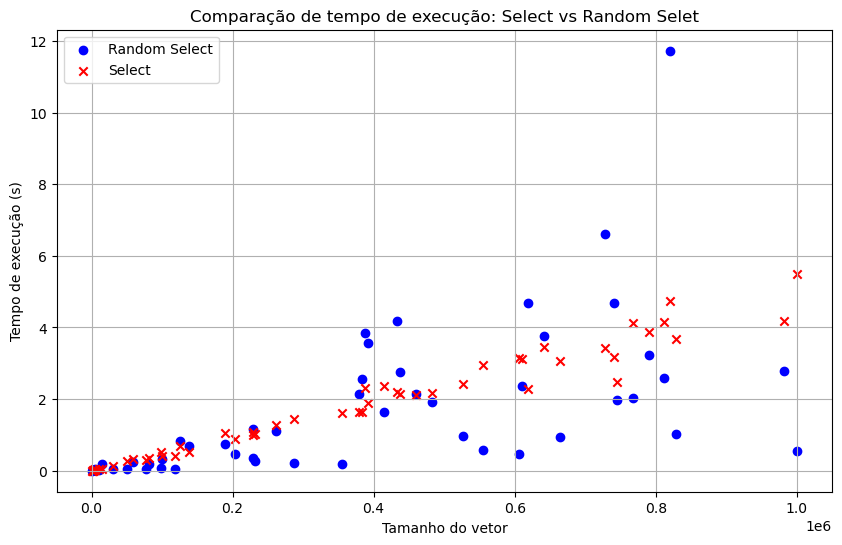

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(sizes, times_random_select, color='blue', label='Random Select', marker='o')
plt.scatter(sizes, times_select, color='red', label='Select', marker='x')

plt.xlabel("Tamanho do vetor")
plt.ylabel("Tempo de execução (s)")
plt.title("Comparação de tempo de execução: Select vs Random Selet")
plt.legend()
plt.grid(True)
plt.show()